In [51]:
from scipy import stats
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib
%matplotlib inline

In [49]:
x = np.arange(0,1,0.001)

# set hyperparameters for prior
alpha = 1
beta = 1

# compute pdf for prior distribution
prior = stats.beta(alpha, beta).pdf(x)

# observe some data
n = 10  # number of heads
m = 100 # number of tails

# compute pdf for posterior 
posterior = stats.beta(alpha + n, beta + m).pdf(x)

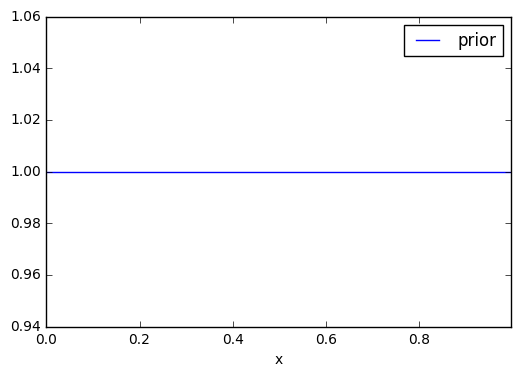

In [45]:
pd.DataFrame({"x" : x, "prior" : prior}).plot(x="x");

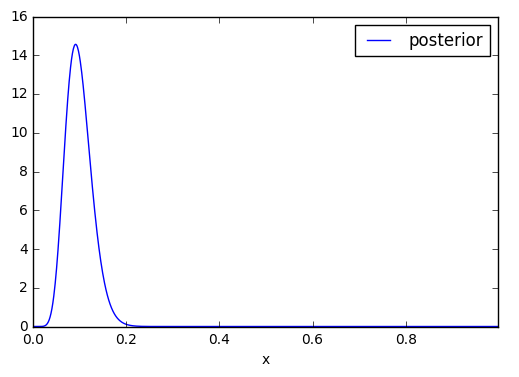

In [44]:
pd.DataFrame({"x" : x, "posterior" : posterior}).plot(x="x");

In [63]:
with pm.Model() as model:
    theta = pm.Beta("theta", alpha=alpha + n, beta=beta + m)
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step)

100%|██████████| 10000/10000 [00:01<00:00, 9745.09it/s] | 65/10000 [00:00<00:15, 649.80it/s]


(0, 1)

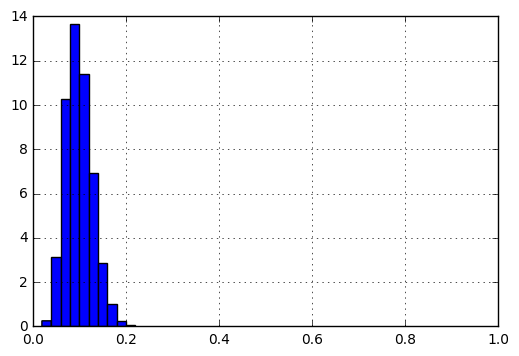

In [71]:
ax = pd.Series(trace["theta"]).hist(normed=True)
ax.set_xlim(0,1)